# More Examples: 2-layer

being an extension of the previous examples notebook, so we have our nice and now 
familiar datasets; therefore, again starting with

## Perceptron and Single-Layer NN




#### Iris Dataset

In [980]:
# !wget -c https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data

In [981]:
import numpy as np

data = np.genfromtxt('iris.data', delimiter=',', usecols=(0,1,2,3))
print(data[:5,])
print(data.shape)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
(150, 4)


#### First 2 classes only

In [982]:
X = data[:100,]

In [983]:
y = np.zeros(100)
y[50:] = 1

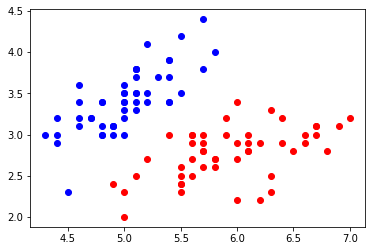

In [984]:
import matplotlib.pyplot as plt

plt.plot(X[:50,0], X[:50,1], 'o', c='b')
plt.plot(X[50:,0], X[50:,1], 'o', c='r')
plt.show()

#### Perceptron starting weights

In [985]:
np.random.seed(seed=1)
w = np.random.rand(4)

#### Threshold

In [986]:
t = 0.5

#### Apply weights to first observation

In [987]:
o = float(np.dot(X[0,], w) > t)
print(o)
print(y[0])

1.0
0.0


#### Perceptron code

In [988]:
def percep(X, y, t, steps, l):
    w = np.random.rand(X.shape[1]) # UPDATE!!!
    for j in range(steps):
        for i in range(X.shape[0]):
            o = float(sum(X[i,] * w) > t)
            w += l * (y[i] - o) * X[i,] 
    return w

w = percep(X, y, t, 10, 0.02)

print(w)

[-0.06124411 -0.08166141  0.20626021  0.36956073]


#### Perfect separation 

In [989]:
p = (np.dot(X, w)>t)*1
print(p, sum(p))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1] 50


#### Sigmoid Function

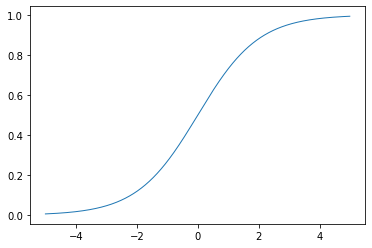

In [990]:
f = lambda x: 1. / (1. + np.exp(-x))

xs = np.arange(-5, +5, .01)
plt.plot(xs, f(xs), lw=1)
plt.show()

#### Single-layer feed-forward Neural Net with Gradient Descent

In [991]:
def f(x):
    return 1. / (1. + np.exp(-x))

def nn1(X, y, l=0.01, epochs=50):
    w = np.random.rand(X.shape[1]) - 0.5
    for ep in range(epochs):
        h = np.dot(X, w)
        a = f(h)
        e = a - y
        w += np.dot(-l * (a - y) * a * (1 - a), X)
        # if ep % (epochs/10) == 0: print(w, sum(e**2))
    return w, sum(e**2)

In [992]:
w, e = nn1(data[:100,], y)
print(w, e)

[-0.31404571 -0.87156577  1.36248551  0.80165054] 0.8859153983322959


#### Perfect Separation

when interpreting output layer as class = activation > 0.5

In [993]:
p = 1 * (f(np.dot(X, w)) > 0.5)
print(p, sum(p))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1] 50


#### Car evaluation dataset

https://archive.ics.uci.edu/ml/datasets/Car+Evaluation

Here we need to do some conversion on the non-numeric input:

In [994]:
import pandas as pd

d0 = { 'vhigh':3, 'high':2, 'med':1, 'low':0 }
d2 = { '2':2, '3':3, '4':4, '5more':5 }
d3 = { '2':2, '4':4, 'more':6 }
d4 = { 'small':0, 'med':1, 'big':2 }
d5 = { 'low':0, 'med':1, 'high':2 }
d6 = { 'unacc':0, 'acc':1, 'good':1, 'vgood':1 }

df = pd.read_csv('car.data', header=None, 
    converters={0: lambda x: d0[x], 
                1: lambda x: d0[x],
               2: lambda x: d2[x],
               3: lambda x: d3[x],
               4: lambda x: d4[x],
               5: lambda x: d5[x],
               6: lambda x: d6[x],} )
print(df[6].value_counts())

df1 = pd.read_csv('car.data', header=None) 
cat_columns = df1.select_dtypes(['object']).columns
df1[cat_columns] = df1[cat_columns].apply(lambda x: pd.factorize(x)[0])
df1.head()

0    1210
1     518
Name: 6, dtype: int64


0  1  2  3  4  5  6
0  0  0  0  0  0  0  0
1  0  0  0  0  0  1  0
2  0  0  0  0  0  2  0
3  0  0  0  0  1  0  0
4  0  0  0  0  1  1  0

In [995]:
df.head()

0  1  2  3  4  5  6
0  3  3  2  2  0  0  0
1  3  3  2  2  0  1  0
2  3  3  2  2  0  2  0
3  3  3  2  2  1  0  0
4  3  3  2  2  1  1  0

#### Balanced Classes

Equal number of observations in all classes 
- avoids learning to always predict the most frequent class
- makes it easier for us to interpret training outcomes

In [996]:
n = min(df[6].value_counts())
print(n)

518


Pandas groupby() and sample() are very helpful here:
- first sample(): balance classes
- second sample(): shuffle

In [997]:
df = df.groupby(6).sample(n=n).sample(frac=1)

In [998]:
print(df[6])

872     0
716     1
1667    1
1370    1
1482    0
       ..
1586    1
347     1
1262    1
248     0
1495    1
Name: 6, Length: 1036, dtype: int64


In [999]:
print(df[6].value_counts())

0    518
1    518
Name: 6, dtype: int64


#### Split X, y

In [1000]:
y = df[6]
X = df.drop(6, axis=1)

#### Split Training/Testing

Only evaluation on data the model has not seen during training is meaningful for practical application. 

In [1001]:
from sklearn.model_selection import train_test_split

X, X_, y, y_ = train_test_split(X, y, test_size=0.2)

In [1002]:
X

0  1  2  3  4  5
1316  0  3  2  6  0  2
1504  0  2  5  6  0  1
1448  0  2  3  4  2  2
800   2  0  3  4  2  2
211   3  2  5  6  1  1
...  .. .. .. .. .. ..
1462  0  2  4  2  1  1
195   3  2  5  2  2  0
1289  1  0  5  6  0  2
1253  1  0  4  4  0  2
53    3  3  3  6  2  2

[828 rows x 6 columns]

In [1003]:
y

1316    0
1504    1
1448    1
800     1
211     0
       ..
1462    0
195     0
1289    1
1253    1
53      0
Name: 6, Length: 828, dtype: int64

#### Train Neural Net

In [1004]:
w, e = nn1(X, y)
print(w, e)

[-2.34682251 -1.93579214 -1.32945458  1.30647111 -0.0341668   2.86601138] 179.77313865831107


#### Predict vs Actual

In [1005]:
p = 1 * (f(np.dot(X_, w)) > 0.5)
print(p, sum(p==y_)/len(p))

[1 0 0 1 1 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 1 1 1 0 1 0
 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 1 0 1 1 0 0 0 1 0 1 0 1 1 0 1 0 1 1 1 0 1 0
 1 0 1 0 0 0 1 1 1 1 0 0 0 0 1 1 1 0 0 1 1 0 0 1 0 0 0 1 0 1 0 1 0 0 1 0 0
 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0
 0 0 1 1 1 0 0 1 0 0 0 1 1 0 1 0 1 0 0 1 1 1 1 1 0 0 0 1 0 1 0 0 1 0 1 1 1
 1 0 1 0 1 0 1 1 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0] 0.7884615384615384


#### Compare with Perceptron

In [1006]:
X = np.asarray(X)
y = np.asarray(y)

In [1007]:
t = 0.5
w = percep(np.asarray(X), np.asarray(y), t, 150, 0.01)
print(w)

[-0.15485764 -0.10125306 -0.03782658  0.04715564  0.02527043  0.30981501]


In [1008]:
p = 1 * (np.dot(X_, w) > t)
print(p, sum(p==y_)/len(p))

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0
 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0] 0.5769230769230769


# Two-layer Feed-Forward NN

In [1009]:
def nn2(X, y, l=0.01, epochs=100, h=3):
    if y.ndim==1: y = np.reshape(np.ravel(y), (len(y),1))
    Wij = np.random.rand(h, X.shape[1]) - 0.5
    Wjk = np.random.rand(y.shape[1], h) - 0.5
    for ep in range(epochs):
        zj = np.dot(Wij, X.T)
        aj = f(zj)
        zk = np.dot(Wjk, aj)
        ak = f(zk)
        dk = (ak - y.T) * f(zk) * (1 - f(zk))
        Wjk += np.dot(-l * dk, aj.T)
        dj = f(zj) * (1 - f(zj)) * np.dot(dk.T, Wjk).T
        Wij += np.dot(-l * dj, X)
        if ep % (epochs/10) == 0: 
            print(np.sum(abs(ak-y.T), axis=1)/len(X))
    return Wij, Wjk

Still the car evaluation dataset -- check training and testing data again (just to make sure!)

In [1010]:
X.shape

(828, 6)

In [1011]:
y.shape

(828,)

In [1012]:
X_.shape

(208, 6)

In [1013]:
y_.shape

(208,)

Let's try a lot of hidden units:

In [1014]:
W1, W2 = nn2(X, y, epochs=50, h=100, l=0.01)

[0.4962938]
[0.48623781]
[0.4963768]
[0.4963768]
[0.4963768]
[0.4963768]
[0.4963768]
[0.4963768]
[0.4963768]
[0.4963768]


We get stuck very far from the global optimum. Try a lower learning rate,
but then we need more epochs:

In [1015]:
W1, W2 = nn2(X, y, epochs=50, h=100, l=0.001)

[0.4768095]
[0.44841883]
[0.42026439]
[0.40600883]
[0.38509225]
[0.37620769]
[0.36129801]
[0.35420392]
[0.34425806]
[0.33779577]


Tricky parameters; let's use those weights on the test data:

In [1016]:
W1.shape

(100, 6)

In [1017]:
W2.shape

(1, 100)

Here is our feed-forward code, this time with the two-layer net 
a little more than a one-liner, so we define a function:

In [1018]:
def ffwd(X, y, Wij, Wjk):
    if y.ndim==1: y = np.reshape(np.ravel(y), (len(y),1))
    zj = np.dot(Wij, X.T)
    aj = f(zj)
    zk = np.dot(Wjk, aj)
    ak = f(zk)
    return ak # np.sum(abs(ak-y.T), axis=1)/len(X)

Output activations for the test data:

In [1019]:
ak_ = ffwd(X_, y_, W1, W2)

Interpret as classification so we can compute accuracy:

In [1020]:
sum(1 * (ak_[0] > 0.5) == y_)/len(y_)

0.8125

Compare with training data:

In [1021]:
ak = ffwd(X, y, W1, W2)
ak.shape, y.shape

((1, 828), (828,))

In [1022]:
sum(1 * (ak[0] > 0.5) == y)/len(y)

0.8345410628019324

### Mushrooms Dataset

https://archive.ics.uci.edu/ml/datasets/Mushroom

Very nice synthetic dataset for mushroom classification into edible/poisonous (first col)


In [1049]:
!wget -nc https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data

File ‘agaricus-lepiota.data’ already there; not retrieving.



In [1193]:
df = pd.read_csv('agaricus-lepiota.data', header=None)

All attributes are single-character:

In [1194]:
df

0  1  2  3  4  5  6  7  8  9   ... 13 14 15 16 17 18 19 20 21 22
0     p  x  s  n  t  p  f  c  n  k  ...  s  w  w  p  w  o  p  k  s  u
1     e  x  s  y  t  a  f  c  b  k  ...  s  w  w  p  w  o  p  n  n  g
2     e  b  s  w  t  l  f  c  b  n  ...  s  w  w  p  w  o  p  n  n  m
3     p  x  y  w  t  p  f  c  n  n  ...  s  w  w  p  w  o  p  k  s  u
4     e  x  s  g  f  n  f  w  b  k  ...  s  w  w  p  w  o  e  n  a  g
...  .. .. .. .. .. .. .. .. .. ..  ... .. .. .. .. .. .. .. .. .. ..
8119  e  k  s  n  f  n  a  c  b  y  ...  s  o  o  p  o  o  p  b  c  l
8120  e  x  s  n  f  n  a  c  b  y  ...  s  o  o  p  n  o  p  b  v  l
8121  e  f  s  n  f  n  a  c  b  n  ...  s  o  o  p  o  o  p  b  c  l
8122  p  k  y  n  f  y  f  c  n  b  ...  k  w  w  p  w  o  e  w  v  l
8123  e  x  s  n  f  n  a  c  b  y  ...  s  o  o  p  o  o  p  o  c  l

[8124 rows x 23 columns]

Good balance for the target value:

In [1195]:
df[0].value_counts()

e    4208
p    3916
Name: 0, dtype: int64

Very simple conversion for edible/poisonous into 1/0:

In [1196]:
y = np.asarray((df[0] == 'e') * 1)

In [1197]:
y.shape

(8124,)

In [1198]:
y

array([0, 1, 1, ..., 1, 0, 1])

Many options for going from singe character to numeric, this is probably the simplest one:
position of character in Unicode table, identical to position in ASCII table for
ASCII characters:

In [1199]:
ord('a'), ord('z'), ord('a')-96, ord('z')-96

(97, 122, 1, 26)

There seems to be no particular order in the values, e.g. looking at df[1] which is
the shape of the head (of the mushroom), we have a nominal scale; see the dataset
description: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s 

In [1200]:
df[2].value_counts()

y    3244
s    2556
f    2320
g       4
Name: 2, dtype: int64

So we feel justified in our very simple ord() coding:

... did not work at all!!!

subtract ord('m') to improve:   

In [1201]:
X = np.asarray([ [ ord(x)-ord('m') for x in df[i] ] for i in range(1,df.shape[1]) ]).T

In [1202]:
X

array([[ 11,   6,   1, ...,  -2,   6,   8],
       [ 11,   6,  12, ...,   1,   1,  -6],
       [-11,   6,  10, ...,   1,   1,   0],
       ...,
       [ -7,   6,   1, ..., -11, -10,  -1],
       [ -2,  12,   1, ...,  10,   9,  -1],
       [ 11,   6,   1, ...,   2, -10,  -1]])

Now the net will have a much easier time learning the classes.

In [1203]:
X.shape

(8124, 22)

In [1204]:
X

array([[ 11,   6,   1, ...,  -2,   6,   8],
       [ 11,   6,  12, ...,   1,   1,  -6],
       [-11,   6,  10, ...,   1,   1,   0],
       ...,
       [ -7,   6,   1, ..., -11, -10,  -1],
       [ -2,  12,   1, ...,  10,   9,  -1],
       [ 11,   6,   1, ...,   2, -10,  -1]])

In [1205]:
y

array([0, 1, 1, ..., 1, 0, 1])

In [1206]:
np.random.seed(seed=1)

In [1207]:
X, X_, y, y_ = train_test_split(X, y, test_size=0.2)

Train weights on the training set:

In [1208]:
W1, W2 = nn2(X, y, epochs=20, h=40, l=0.001)

[0.50730624]
[0.43441092]
[0.31689023]
[0.2176154]
[0.17447584]
[0.16265699]
[0.15582494]
[0.1532763]
[0.15937127]
[0.16889926]


Compute output activations for the test set X_, y_

In [1209]:
ak = ffwd(X_, y_, W1, W2)

In [1210]:
ak.shape, y_.shape

((1, 1625), (1625,))

interpret as classification:

In [1211]:
sum(1 * (ak[0] > 0.5) == y_)/len(y_)

0.8978461538461538

#### finish mushrooms &#9760;

- re-scale
- train/test split
- nn2(), interpret as classification .. todo

#### Sentiment Labelled Sentences Data Set

https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences

- import see recurr.ipynb
- encoding voc + one-hot

In [1310]:
import numpy as np

np.random.seed(seed=1)

data = [ line.split() for line in open('imdb_labelled.txt') ]
print(len(data))
print(data[0])

1000
['A', 'very,', 'very,', 'very', 'slow-moving,', 'aimless', 'movie', 'about', 'a', 'distressed,', 'drifting', 'young', 'man.', '0']


Now we make sentences from the ...

In [1311]:
sents = [ [ w.strip('.,') for w in line[:-1] ] for line in data ]
print(sents[0])

['A', 'very', 'very', 'very', 'slow-moving', 'aimless', 'movie', 'about', 'a', 'distressed', 'drifting', 'young', 'man']


Create vocabulary from words in sentiment sentences

In [1312]:
voc = {}
for sent in sents:
    for w in sent:
        if w in voc: voc[w] += 1
        else: voc[w] = 1
        
print(voc['movie'])
print(voc['very'])

169
58


In [1313]:
[ w for w in voc if voc[w] > 100 ][:5]

['movie', 'a', 'was', 'the', 'of']

Encode one-hot on vocabulary membership:

In [1314]:
X = np.asarray([ [ int(w in sent) for w in voc if voc[w] > 10 ] for sent in sents ])
print(X.shape)

(1000, 178)


In [1315]:
y = np.asarray([ int(line[-1]) for line in data ])
print(y.shape)
print('mean sentence length:', np.mean([len(s) for s in sents]))
print(y[:10])
print(len(y), sum(y))

(1000,)
mean sentence length: 14.355
[0 0 0 0 1 0 0 1 0 1]
1000 500


In [1316]:
X, X_, y, y_ = train_test_split(X, y, test_size=0.2)

Another very tricky parameter choice:

In [1317]:
W1, W2 = nn2(X, y, epochs=500, h=200, l=0.001)

[0.49417582]
[0.46587287]
[0.45305941]
[0.43924379]
[0.42732596]
[0.41683926]
[0.40741155]
[0.39878926]
[0.39081095]
[0.38337538]


In [1318]:
ak = ffwd(X_, y_, W1, W2)

In [1319]:
ak.shape, y_.shape

((1, 200), (200,))

In [1320]:
sum(1 * (ak[0] > 0.5) == y_)/len(y_)

0.64

.. and moderately successful results.